Вариант 26

Задание 9. Для таблично заданной функции построить интерполяционные многочлены Лагранжа второй и третьей степени. Проверить многочлен в любой узловой точке. Вычислить значение функции в точке *x**, учитывая положение заданной точки на интервале (таблица заданий 6)

In [3]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import ctypes

In [4]:
lib = ctypes.CDLL('../1_matrix/a.dll')

lib.create_matrix.restype = ctypes.c_void_p
lib.create_matrix.argtypes = (ctypes.c_int, ctypes.c_int, ctypes.POINTER(ctypes.c_double))

lib.free_matrix.argtypes = (ctypes.c_void_p,)

lib.matrix_solve_thomas.argtypes = (ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double))

lib.matrix_solve_gauss.argtypes = (ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double))

In [5]:
xs = [2.41, 2.93, 3.45, 3.97, 4.49, 5.01, 5.53, 6.05, 6.57]
ys = [3.6571, 4.8342, 4.4874, 5.2531, 6.4985, 5.7312, 2.3478, 1.4184, 1.1725]

x_star = 3.682

def take_closest(xs, ys, x, k) -> Tuple[list, list, list[int]]:
    """**return** xs, ys, idsx """
    idxs = list(range(len(xs)))
    idxs.sort(key=lambda i: abs(xs[i] - x))
    idxs = sorted(idxs[:k])
    return [xs[i] for i in idxs], [ys[i] for i in idxs], idxs

def get_grid(dots: List[float], dots_count: int = 10):
    grid = [dots[0]]
    for i in range(len(dots)-1):
        x0 = dots[i]
        x1 = dots[i+1]
        for j in range(1, dots_count+1):
            grid.append(x0 + (x1 - x0) * j / dots_count)
    return grid

Узлы для степени 2:  [2.93, 3.45, 3.97]
Значение P2(x*) = 4.6915702958579875

Проверка в узловой точке полинома 2 степени x = 2.93
Настоящее значение = 4.8342
Интерполяция = 4.8342

Узлы для степени 3:  [2.93, 3.45, 3.97, 4.49]
Значение P3(x*) = 4.729258331543012

Проверка в узловой точке полинома 3 степени x = 3.45
Настоящее значение = 4.4874
Интерполяция = 4.4874


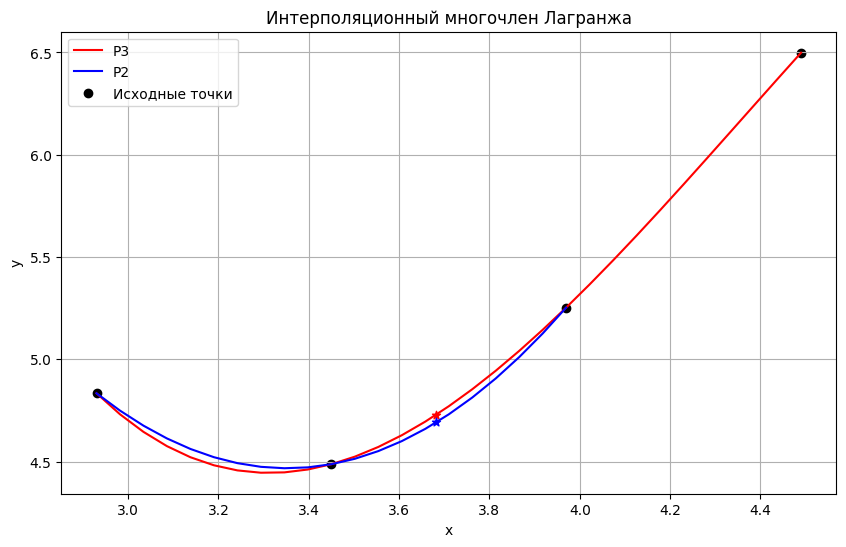

In [6]:

def lagrange(x, xs, ys):
    total = 0.0
    n = len(xs)
    for i in range(n):
        f_i = ys[i]
        for j in range(n):
            if i != j:
                f_i *= (x - xs[j]) / (xs[i] - xs[j])
        total += f_i
    return total


# Вторая степень
xs2, ys2, idx2 = take_closest(xs, ys, x_star, 3)
p2 = lagrange(x_star, xs2, ys2)
print("Узлы для степени 2: ", xs2)
print(f"Значение P2(x*) = {p2}\n")

# Проверка в узловой точке
test_index = idx2[0]
print(f"Проверка в узловой точке полинома 2 степени x = {xs[test_index]}")
print(f"Настоящее значение = {ys[test_index]}")
print(f"Интерполяция = {lagrange(xs[test_index], xs2, ys2)}\n")

# Третья
xs3, ys3, idx3 = take_closest(xs, ys, x_star, 4)
p3 = lagrange(x_star, xs3, ys3)
print("Узлы для степени 3: ", xs3)
print(f"Значение P3(x*) = {p3}\n")

# Проверка в узловой точке
test_index = idx3[1]
print(f"Проверка в узловой точке полинома 3 степени x = {xs[test_index]}")
print(f"Настоящее значение = {ys[test_index]}")
print(f"Интерполяция = {lagrange(xs[test_index], xs3, ys3)}")


plt.figure(figsize=(10,6))
    
grid = get_grid(xs3)
plt.plot(grid, [lagrange(i, xs3, ys3) for i in grid], color='r', label='P3')
plt.scatter(x_star, [lagrange(x_star, xs3, ys3)], color='r', marker="*")
grid = get_grid(xs2)
plt.plot(grid, [lagrange(i, xs2, ys2) for i in grid], color='b', label='P2')
plt.scatter(x_star, [lagrange(x_star, xs2, ys2)], color='b', marker="*")

plt.scatter(xs3, ys3, color='k', label='Исходные точки')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяционный многочлен Лагранжа')
plt.legend()
plt.grid(True)
plt.show()

Задание 10. Для таблично заданной функции построить интерполяционные многочлены Ньютона второй и третьей степени. Проверить многочлен в любой узловой точке. Вычислить значение функции в точке *x**, учитывая положение заданной точки на интервале. Выполнить оценку погрешности каждого многочлена (Таблица заданий 6).

Узлы 2 степени: [1, 2, 3] [2.93, 3.45, 3.97]
P2(x*) = 4.6915702958579875

Узлы 3 степени: [1, 2, 3, 4] [2.93, 3.45, 3.97, 4.49]
P3(x*) = 4.729258331543012

Проверка в узловой точке x = 3.45
Реальное значение = 4.4874
Интерполяция = 4.4874

Оценка погрешности P2: 0.03768803568502488
Оценка погрешности P3: 0.07563565078533596


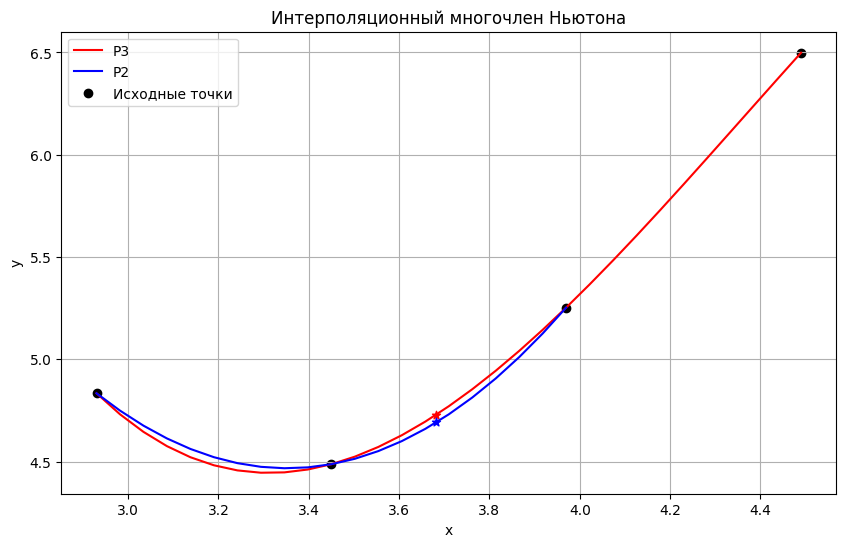

In [7]:

#  𝑓(𝑥𝑖,𝑥𝑗) =(𝑓(𝑥𝑖)−𝑓(𝑥𝑗)) / (𝑥𝑖−𝑥𝑗)
def divided_diffs(xs, ys):
    n = len(xs)
    # [𝑓(𝑥0,𝑥1,⋯,𝑥n)]
    row = [y for y in ys]
    coeffs = [ys[0]]
    for k in range(1, n):
        new_row = []
        for i in range(n - k):
            # 𝑓(𝑥0,𝑥1,⋯,𝑥n, 𝑥n+1)
            diff = (row[i+1] - row[i]) / (xs[i+k] - xs[i])
            new_row.append(diff)
        coeffs.append(new_row[0])
        row = new_row
    return coeffs


def newton(x, xs, coeffs):
    total = 0
    product = 1
    for i in range(len(coeffs)):
        total += coeffs[i] * product
        product *= (x - xs[i])
    return total


xs2, ys2, idx2 = take_closest(xs, ys, x_star, 3)
coeff2 = divided_diffs(xs2, ys2)
p2 = newton(x_star, xs2, coeff2)
print("Узлы 2 степени:", idx2, xs2)
print(f"P2(x*) = {p2}\n")

# --- 3-я степень ---
xs3, ys3, idx3 = take_closest(xs, ys, x_star, 4)
coeff3 = divided_diffs(xs3, ys3)
p3 = newton(x_star, xs3, coeff3)
print("Узлы 3 степени:", idx3, xs3)
print(f"P3(x*) = {p3}\n")

# Проверка в узловой точке
test_index = idx2[1]
test_interp = newton(xs[test_index], xs2, coeff2)
print(f"Проверка в узловой точке x = {xs[test_index]}")
print(f"Реальное значение = {ys[test_index]}")
print(f"Интерполяция = {test_interp}\n")

# Погрешность
error2 = abs(p3 - p2)
print("Оценка погрешности P2:", error2)

xs4, ys4, idx4 = take_closest(xs, ys, x_star, 5)
coeff4 = divided_diffs(xs4, ys4)
p4 = newton(x_star, xs4, coeff4)
error3 = abs(p3 - p4)
print("Оценка погрешности P3:", error3)


plt.figure(figsize=(10,6))
    
grid = get_grid(xs3)
plt.plot(grid, [newton(i, xs3, coeff3) for i in grid], color='r', label='P3')
plt.scatter(x_star, [newton(x_star, xs3, coeff3)], color='r', marker="*")
grid = get_grid(xs2)
plt.plot(grid, [newton(i, xs2, coeff2) for i in grid], color='b', label='P2')
plt.scatter(x_star, [newton(x_star, xs2, coeff2)], color='b', marker="*")
plt.scatter(xs3, ys3, color='k', label='Исходные точки')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяционный многочлен Ньютона')
plt.legend()
plt.grid(True)
plt.show()

Задание 11. Для таблично заданной функции с неравномерной сеткой построить естественный кубический сплайн дефекта 1. Вычислить значение сеточной функции в заданной точке x^* Указать коэффициенты сплайна на отрезке, включающим точку x* (таблица заданий 7).

In [8]:
def cpp_matrix_create(rows, cols, data_2d):
    flat = [x for row in data_2d for x in row]
    arr = (ctypes.c_double * len(flat))(*flat)
    return lib.create_matrix(rows, cols, arr)


def solve_tridiagonal_cpp(a, b, c, d):
    n = len(b)
    if n == 0: return []

    A = [[0.0] * n for _ in range(n)]
    for i in range(n):
        A[i][i] = b[i]
        if i > 0: A[i][i-1] = a[i]
        if i < n-1: A[i][i+1] = c[i]

    A_cpp = cpp_matrix_create(n, n, A)
    d_arr = (ctypes.c_double * n)(*d)
    res_arr = (ctypes.c_double * n)()

    lib.matrix_solve_thomas(A_cpp, d_arr, res_arr)
    result = [res_arr[i] for i in range(n)]

    lib.free_matrix(A_cpp)
    return result

In [9]:
xs = [0.00, 1.794, 3.174, 4.83, 5.796, 7.314, 8.418, 10.212, 11.454, 12.972, 13.80]
ys = [5.837, 7.103, 4.751, 4.012, 2.856, 0.768, 1.257, 0.246, -0.621, 0.344, 1.867]

x_star = 2.139


x* = 2.139 лежит на отрезке [1.794, 3.174]
Коэффициенты (a,b,c,d) на этом отрезке:
(7.103, -0.950943886491115, -1.3851417267727528, 0.60811365435337)

S(x*) = 6.635029216191185


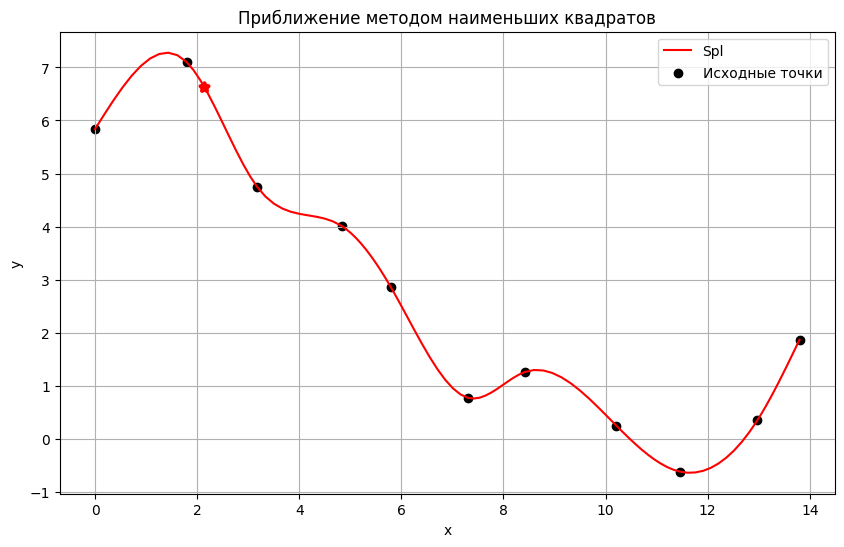

In [10]:

def cubic_spline(xs, ys):
    n = len(xs)
    h = [xs[i+1] - xs[i] for i in range(n-1)]

    a = [0]*(n-2)
    b = [0]*(n-2)
    c = [0]*(n-2)
    d = [0]*(n-2)

    # hi-1 * ci-1 + 2(hi-1 + hi) * ci + hi*ci+1 = 3[(yi -yi-1) / hi - (yi-1 - yi-2) / hi-1]
    for i in range(1, n-1):
        a[i-1] = h[i-1]
        b[i-1] = 2*(h[i-1] + h[i])
        c[i-1] = h[i]
        # y сдвинуты на единицу тк первый c0 и последний cn+1 (проще считать) здесь не расчитываются 
        d[i-1] = 3*((ys[i+1]-ys[i])/h[i] - (ys[i]-ys[i-1])/h[i-1])

    C_inner = solve_tridiagonal_cpp(a, b, c, d)

    C_ = [0] + C_inner + [0]
    return C_


def spline_coeffs(xs, ys, C):
    n = len(xs)
    coeffs = []
    # hi-1 * ci-1 + 2(hi-1 + hi) * ci + hi*ci+1 = 3[(yi -yi-1) / hi - (yi-1 - yi-2) / hi-1]
    for i in range(n-1):
        h = xs[i+1] - xs[i]
        a = ys[i]
        b = (ys[i+1] - ys[i]) / h - (2*C[i] + C[i+1]) * h / 3
        c = C[i]
        d = (C[i+1] - C[i]) / (3*h)
        coeffs.append((a, b, c, d))
    return coeffs

def spline_eval(x, xs, coeffs):
    for i in range(len(xs)-1):
        if xs[i] <= x <= xs[i+1]:
            a,b,c,d = coeffs[i]
            t = x - xs[i]
            return a + b*t + c*t*t + d*t*t*t, i
    raise ValueError("x вне диапазона")


C_ = cubic_spline(xs, ys)
coeffs = spline_coeffs(xs, ys, C_)
value, idx = spline_eval(x_star, xs, coeffs)

print(f"x* = {x_star} лежит на отрезке [{xs[idx]}, {xs[idx+1]}]")
print("Коэффициенты (a,b,c,d) на этом отрезке:")
print(coeffs[idx])
print(f"\nS(x*) = {value}")


plt.figure(figsize=(10,6))

grid = get_grid(xs)
plt.plot(grid, [spline_eval(i, xs, coeffs)[0] for i in grid], color='r', label='Spl')

plt.scatter(xs, ys, color='k', label='Исходные точки')
plt.scatter(x_star, [spline_eval(x_star, xs, coeffs)[0]], color='r',marker="*", linewidths=3.0)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Приближение методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()

Задание 12. Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены первой, второй и третьей степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить общий график всех многочленов и приближаемой функции. Вычислить значения всех приближающих многочленов в точке x* (таблица заданий 8).

In [11]:
def cpp_matrix_create(rows, cols, data_2d):
    flat = [x for row in data_2d for x in row]
    arr = (ctypes.c_double * len(flat))(*flat)
    return lib.create_matrix(rows, cols, arr)

def cpp_matrix_solve_gauss(A, b):
    n = len(b)
    b_arr = (ctypes.c_double * n)(*b)
    res_arr = (ctypes.c_double * n)()

    lib.matrix_solve_gauss(A, b_arr, res_arr)
    return [res_arr[i] for i in range(n)]

Степень: 1
Коэффициенты: ['-1.199558', '3.054012']
SSE = 4.902213
P(1.126) = 2.239259

Степень: 2
Коэффициенты: ['-0.926422', '1.688330', '1.011616']
SSE = 4.628667
P(1.126) = 2.257242

Степень: 3
Коэффициенты: ['0.011449', '-9.749723', '23.341873', '-11.027287']
SSE = 0.350333
P(1.126) = 2.884993



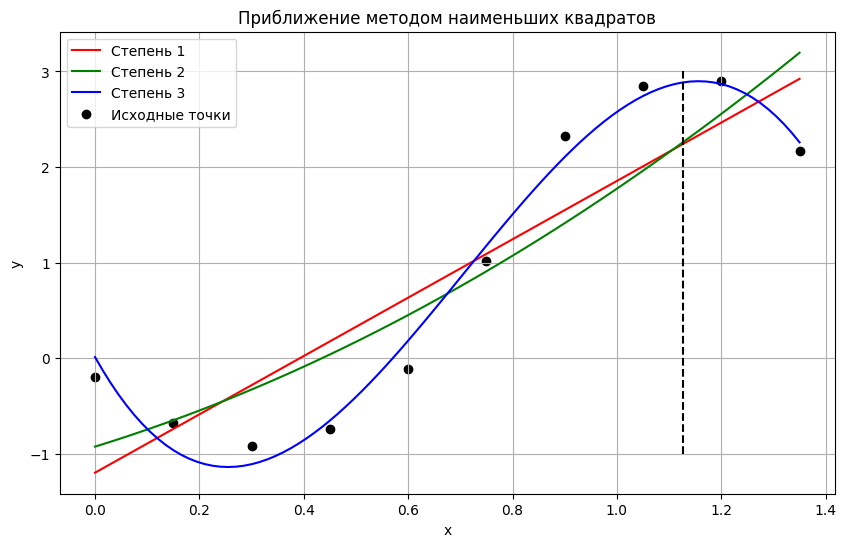

In [12]:
%matplotlib inline
# %matplotlib widget

import matplotlib.pyplot as plt

xs = [0.0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35]
ys = [-0.1941, -0.6827, -0.9169, -0.7467, -0.1093, 1.0125, 2.3294, 2.8518, 2.9038, 2.1712]

x_star = 1.126


def mnk_coeffs(xs, ys, degree):
    n = len(xs)
    m = degree + 1

    A = [[0]*m for _ in range(m)]
    b = [0]*m
    
    for k in range(m):  # строки
        for i in range(m):  # столбцы 
            A[k][i] = sum(xs[j] ** (k + i) for j in range(n))  # все иксы 
        b[k] = sum(ys[j] * (xs[j] ** k) for j in range(n))

    mat_ptr = cpp_matrix_create(m, m, A)
    sol = cpp_matrix_solve_gauss(mat_ptr, b)
    lib.free_matrix(mat_ptr)

    return sol


def poly_eval(coeffs, x):
    return sum(c*x**i for i, c in enumerate(coeffs))

def sse(coeffs, xs, ys):
    return sum((poly_eval(coeffs, xs[i]) - ys[i])**2 for i in range(len(xs)))

results = []
for deg in [1, 2, 3]:
    coeffs = mnk_coeffs(xs, ys, deg)
    err = sse(coeffs, xs, ys)
    val_star = poly_eval(coeffs, x_star)
    results.append((deg, coeffs, err, val_star))

for deg, coeffs, err, val_star in results:
    print(f"Степень: {deg}")
    print("Коэффициенты:", ["{:.6f}".format(c) for c in coeffs])
    print(f"SSE = {err:.6f}")
    print(f"P({x_star}) = {val_star:.6f}\n")


plt.figure(figsize=(10,6))
coeffs_list = [mnk_coeffs(xs, ys, deg) for deg in [1,2,3]]
colors = ['r','g','b']
labels = ['Степень 1','Степень 2','Степень 3']
x_vals = get_grid(xs)

for coeffs, color, label in zip(coeffs_list, colors, labels):
    y_vals = [poly_eval(coeffs, x) for x in x_vals]
    plt.plot(x_vals, y_vals, color=color, label=label)

plt.plot([x_star, x_star], [-1.0, 3.0], color='k', linestyle= 'dashed')
plt.scatter(xs, ys, color='k', label='Исходные точки')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Приближение методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


**Задание 13. Выполнить сравнение различных схем численного дифференцирования, вычислив значения первой и второй производной для заданной функции y=f(x). В исследовании использовать 6 различных схем численного дифференцирования первого порядка и 4 схемы для второго порядка, построенных на двух, трех, четырех и пяти точечных шаблонах с разным порядком точности. Расчеты выполниться для шага h и для шага h/2. Графически сравнить результаты с аналитическими значениями.**

In [13]:
import math

def f(x):
    """
    y = (3*cos(x) + 5*x*sin(x) - (x+2)^x) / (2*x^2 + 5*x + 3*ln(x+6))
    """
    numerator = 3 * math.cos(x) + 5 * x * math.sin(x) - (x + 2) ** x
    denominator = 2 * x**2 + 5 * x + 3 * math.log(x + 6)
    return numerator / denominator


# аналитическое решение
def f_d1(x):
    u = 3 * math.cos(x) + 5 * x * math.sin(x) - (x + 2) ** x
    v = 2 * x**2 + 5 * x + 3 * math.log(x + 6)
    u_prime = -3 * math.sin(x) + 5 * (math.sin(x) + x * math.cos(x)) - (x + 2)**x * (math.log(x + 2) + x / (x + 2))
    v_prime = 4 * x + 5 + 3 / (x + 6)
    return (u_prime * v - u * v_prime) / (v ** 2)

def f_d2(x):
    c, s, xp2, ln_xp2, pow_xp2 = math.cos(x), math.sin(x), x+2, math.log(x+2), (x+2)**x
    u = 3*c + 5*x*s - pow_xp2
    v = 2*x**2 + 5*x + 3*math.log(x+6)
    u_prime = -3*s + 5*(s + x*c) - pow_xp2*(ln_xp2 + x/xp2)
    v_prime = 4*x + 5 + 3/(x+6)
    u_double_prime = -3*c + 5*(2*c - x*s) - pow_xp2 * ((ln_xp2 + x/xp2)**2 + 1/xp2 + 2/xp2**2)
    v_double_prime = 4 - 3/(x+6)**2
    w = u_prime*v - u*v_prime
    w_prime = u_double_prime*v - u*v_double_prime
    z = v**2
    return (w_prime*z - w*2*v*v_prime) / z**2

In [14]:

# первые производные
def poin2r_d(x, h, fn):
    return (fn(x + h) - fn(x)) / h

def poin2l_d(x, h, fn):
    return (fn(x) - fn(x - h)) / h

def point2c_d(x, h, fn):
    return (fn(x + h) - fn(x - h)) / (2*h)

def point3_d(x, h, fn):
    return (-3 * fn(x) + 4 * fn(x + h) - fn(x + 2*h)) / (2*h)

def point4_d(x, h, fn):
    return (-2*fn(x - h) -3*fn(x) + 6*fn(x+h) - fn(x + 2*h)) / (6*h)

def point5_d(x, h, fn):
    return (-25*fn(x) + 48*fn(x+h) - 36*fn(x+2*h) + 16*fn(x + 3*h) - 3*fn(x+4*h)) / (12*h)

# вторые производные

def point3r_d2(x, h, fn):
    return (fn(x + h) - 2*fn(x) + fn(x-h)) / (h*h)

def point3l_d2(x, h, fn):
    return (fn(x - 2*h) - 2*fn(x - h) + fn(x)) / (h*h)

def point4_d2(x, h, fn):
    return (2*fn(x) - 5*fn(x+h) + 4*fn(x+2*h) - fn(x + 3*h)) / (h*h)

def point5_d2(x, h, fn):
    return (-fn(x+2*h) + 16*fn(x+h) - 30*fn(x) + 16*fn(x - h) - fn(x-2*h)) / (12*h*h)


# Параметры
x_start = -1.0
x_end = 1.0
n_points = 401
h = 0.1
h2 = h / 2.0

# Генерация точек без numpy
x_vals = []
dx = (x_end - x_start) / (n_points - 1)
for i in range(n_points):
    x_vals.append(x_start + i * dx)

# Вычисление аналитических производных
analytic_d1 = [f_d1(x) for x in x_vals]
analytic_d2 = [f_d2(x) for x in x_vals]

# Словари схем
first_derivative_schemes = {
    "2pt Right": poin2r_d,
    "2pt Left": poin2l_d,
    "2pt Central": point2c_d,
    "3pt Forward": point3_d,
    "4pt Mixed": point4_d,
    "5pt Forward": point5_d,
}

second_derivative_schemes = {
    "3pt Central": point3r_d2,
    "3pt Left": point3l_d2,
    "4pt Forward": point4_d2,
    "5pt Central": point5_d2,
}

# Функция для вычисления значений по схеме
def compute_scheme(x_vals, h, scheme_func, fn):
    results = []
    for x in x_vals:
        try:
            val = scheme_func(x, h, fn)
            results.append(val)
        except (ValueError, ZeroDivisionError, OverflowError):
            results.append(None)  # или float('nan'), но без numpy лучше None
    return results

# Вычисление численных производных
num_d1_h = {}
num_d1_h2 = {}
for name, scheme in first_derivative_schemes.items():
    num_d1_h[name] = compute_scheme(x_vals, h, scheme, f)
    num_d1_h2[name] = compute_scheme(x_vals, h2, scheme, f)

num_d2_h = {}
num_d2_h2 = {}
for name, scheme in second_derivative_schemes.items():
    num_d2_h[name] = compute_scheme(x_vals, h, scheme, f)
    num_d2_h2[name] = compute_scheme(x_vals, h2, scheme, f)

# Вспомогательная функция для максимальной ошибки
def max_error(numerical, analytical):
    max_err = 0.0
    count = 0
    for i in range(len(numerical)):
        if numerical[i] is not None and analytical[i] is not None:
            err = abs(numerical[i] - analytical[i])
            if err > max_err:
                max_err = err
            count += 1
    return max_err if count > 0 else float('inf')

# Вывод ошибок
print("Результаты сравнения:")
print("=" * 60)

print(f"\nПервая производная (h = {h}) | (h = {h2:.3f}):")
for name in first_derivative_schemes:
    err = max_error(num_d1_h[name], analytic_d1)
    print(f"  {name:12s}: {err:.4e}", end='')
    err = max_error(num_d1_h2[name], analytic_d1)
    print(f"   | {err:.4e}")

print(f"\nВторая производная (h = {h}) | (h = {h2:.3f})")
for name in second_derivative_schemes:
    err = max_error(num_d2_h[name], analytic_d2)
    print(f"  {name:12s}: {err:.4e}", end='')
    err = max_error(num_d2_h2[name], analytic_d2)
    print(f"   | {err:.4e}")




Результаты сравнения:

Первая производная (h = 0.1) | (h = 0.050):
  2pt Right   : 2.6644e-01   | 1.3351e-01
  2pt Left    : 2.6640e-01   | 1.3351e-01
  2pt Central : 7.2758e-02   | 1.8165e-02
  3pt Forward : 1.0099e-01   | 3.0559e-02
  4pt Mixed   : 1.4842e-02   | 1.9237e-03
  5pt Forward : 8.7034e-03   | 5.6328e-04

Вторая производная (h = 0.1) | (h = 0.050)
  3pt Central : 1.5671e-01   | 3.9344e-02
  3pt Left    : 5.4724e+00   | 2.4578e+00
  4pt Forward : 1.4152e+00   | 4.0165e-01
  5pt Central : 3.3212e-03   | 2.2056e-04


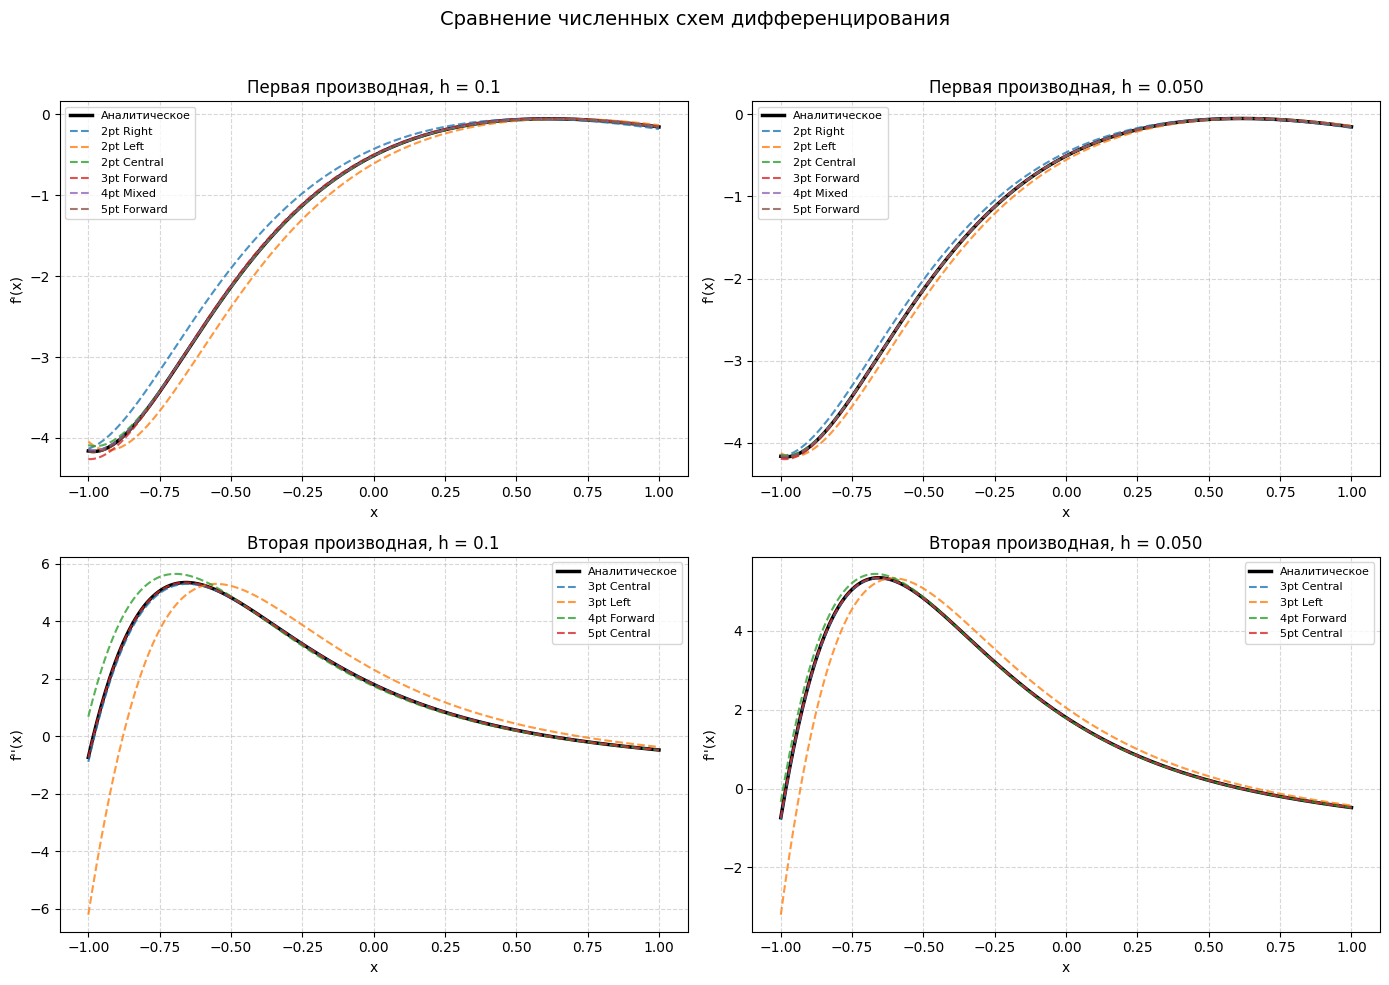

In [18]:
%matplotlib inline
# %matplotlib widget

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("\nБиблиотека matplotlib не установлена. Графики не могут быть построены.")
else:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Сравнение численных схем дифференцирования', fontsize=14)

    # Вспомогательная функция для отрисовки на оси
    def plot_on_ax(ax, x_vals, analytic, numerical_dict, title, ylabel):
        ax.plot(x_vals, analytic, 'k-', linewidth=2.5, label='Аналитическое')
        for name, values in numerical_dict.items():
            x_plot = []
            y_plot = []
            for x, y in zip(x_vals, values):
                if y is not None and not (abs(y) > 1e10):  # фильтр выбросов
                    x_plot.append(x)
                    y_plot.append(y)
            if y_plot:
                ax.plot(x_plot, y_plot, '--', alpha=0.8, label=name)
        ax.set_title(title)
        ax.set_xlabel('x')
        ax.set_ylabel(ylabel)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend(fontsize=8)

    # График 1: f'(x), h
    plot_on_ax(
        axes[0, 0],
        x_vals,
        analytic_d1,
        num_d1_h,
        f"Первая производная, h = {h}",
        "f'(x)"
    )

    # График 2: f'(x), h/2
    plot_on_ax(
        axes[0, 1],
        x_vals,
        analytic_d1,
        num_d1_h2,
        f"Первая производная, h = {h2:.3f}",
        "f'(x)"
    )

    # График 3: f''(x), h
    plot_on_ax(
        axes[1, 0],
        x_vals,
        analytic_d2,
        num_d2_h,
        f"Вторая производная, h = {h}",
        "f''(x)"
    )

    # График 4: f''(x), h/2
    plot_on_ax(
        axes[1, 1],
        x_vals,
        analytic_d2,
        num_d2_h2,
        f"Вторая производная, h = {h2:.3f}",
        "f''(x)"
    )

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # оставить место для общего заголовка
    plt.show()

**Задача 14. Вычислить определенный интеграл по формулам средних прямоугольников, трапеций, Симпсона и Эйлера на равномерной сетке. Шаг интегрирования выбрать таким образом, чтобы на заданном отрезке можно было применить все перечисленные методы. Оценить погрешности методов интегрирования. Уменьшить шаг в два раза и повторить вычисление интегралов. Для каждого метода уточнить полученные значения, используя метод Рунге–Ромберга (таблица заданий 9).**

In [ ]:
def f(x):
    return 1 + 3 * math.exp(-x) * math.sin(x**2)

def f_d(x):
    return 3 * math.exp(-x) * (-math.sin(x**2) + 2*x*math.cos(x**2))

In [ ]:
def midpoint_rule(a, b, n):
    h = (b - a) / n
    result = 0.0
    for i in range(n):
        result += f(a + (i + 0.5) * h)  # mid
    return result * h

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

def simpsons_rule(a, b, n):
    if n % 2 != 0:
        raise ValueError("n должно быть четным для метода Симпсона")
    h = (b - a) / n
    result = f(a) + f(b)
    
    for i in range(1, n):
        result += 2 * f(a + i * h) * (2 if i % 2 == 1 else 1)  # нечетные - x4, четные - x2
    
    return result * h / 3

def euler_method(a, b, n):
    h = (b - a) / n
    trap = trapezoidal_rule(a, b, n)
    correction = (h**2 / 12) * (f_d(a) - f_d(b))
    return trap + correction

def runge_romberg(F_h, F_h2, p):
    return F_h2 + (F_h2 - F_h) / (2**p - 1)


methods = {
    "Средние прямоуг.": (midpoint_rule, 2),
    "Трапеций": (trapezoidal_rule, 2),
    "Симпсона": (simpsons_rule, 4),
    "Эйлера": (euler_method, 4),
}

a, b = 0.0, 3.0
h1 = 0.5
h2 = h1 / 2

n1 = int((b - a) / h1)
n2 = int((b - a) / h2)

print("-" * 104)
print(f"{'Метод':<20} | {'h = 0.5':^12} | {'h = 0.25':^12} | {'Уточненное':^12} | {'Оценка погрешности (|Runge - F_h1|):'}")
print("-" * 104)
for name, (func, ord) in methods.items():
    func_h1 = func(a, b, n1)
    func_h2 = func(a, b, n2)
    runge = runge_romberg(func_h1, func_h2, ord)
    print(f"{name:<20} | {func_h1:^12.6f} | {func_h2:^12.6f} | {runge:^12.6f} | {abs(runge - func_h1):^33.6e}")
print("-" * 104)

--------------------------------------------------------------------------------------------------------
Метод                |   h = 0.5    |   h = 0.25   |  Уточненное  | Оценка погрешности (|Runge - F_h1|):
--------------------------------------------------------------------------------------------------------
Средние прямоуг.     |   3.844513   |   3.833402   |   3.829698   |           1.481483e-02           
Трапеций             |   3.807515   |   3.826014   |   3.832180   |           2.466570e-02           
Симпсона             |   3.859289   |   3.832180   |   3.830373   |           2.891620e-02           
Эйлера               |   3.825808   |   3.830587   |   3.830906   |           5.097903e-03           
--------------------------------------------------------------------------------------------------------


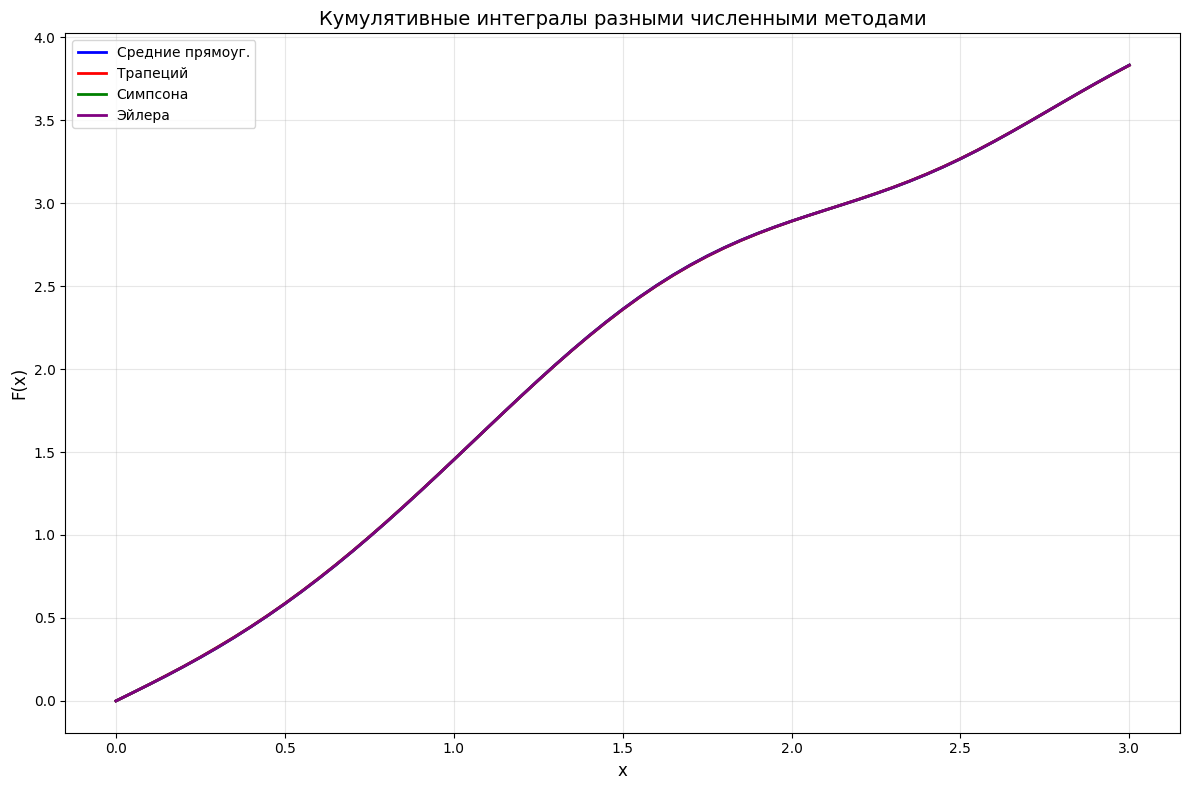

In [91]:
%matplotlib inline
# %matplotlib widget
def plot_cumulative_integral(a=a, b=b, h=h):
    if h < 0:
        raise ValueError("h < 0")
    n_total = 60
    x_plot = [a + i * (b - a) / n_total for i in range(n_total + 1)]

    methods = {
        "Средние прямоуг.": midpoint_rule,
        "Трапеций": trapezoidal_rule,
        "Симпсона": simpsons_rule,
        "Эйлера": euler_method,
    }
    
    cumulative_results = {name: [] for name in methods}
    for name in methods:
        cumulative_results[name].append(0.0)

    for x in x_plot[1:]:
        n = max(1, int((x - a) / h))

        for name, method_func in methods.items():
            try:
                if name == "Симпсона":
                    n_simp = n if n % 2 == 0 else n + 1
                    val = method_func(a, x, n_simp)
                else:
                    val = method_func(a, x, n)
                cumulative_results[name].append(val)
            except Exception as e:
                cumulative_results[name].append(float('nan'))
                print(f"Ошибка при x={x:.3f}, метод={name}: {e}")
    
    plt.figure(figsize=(12, 8))
    
    colors = ['blue', 'red', 'green', 'purple']
    for idx, (name, values) in enumerate(cumulative_results.items()):
        plt.plot(x_plot, values, 
                color=colors[idx % len(colors)], 
                linewidth=2, 
                label=name)
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('F(x)', fontsize=12)
    plt.title('Кумулятивные интегралы разными численными методами', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
plot_cumulative_integral()